In [1]:
import pandas as pd
import numpy as np

#  plot confusion matrices
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


import sys
sys.path.insert(1, '../../')
from py_oqat.config_algorithms import ACOConfig
from py_oqat.classifier import OQATClassifier

In [2]:
SEED = 42

def pretty_print_confusion_matrix(confusion_matrix):
    for row in confusion_matrix:
        print(row)

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    # print(cm)

    df_cm = pd.DataFrame(cm, index = [i for i in classes],
                  columns = [i for i in classes])
    plt.figure(figsize = (7,5))
    sns.heatmap(df_cm, annot=True, cmap=cmap)

    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


In [3]:
df = pd.read_csv('../../datasets/car.csv')

# Separate features and labels into two dataframes
X = df.drop('class', axis=1)
y = df['class']

# Define the feature type for each column (discrete or continuous)
column_names = X.columns.to_list()
column_types = ['cat', 'cat', 'cat', 'cat', 'cat', 'cat']

# transform the dataframes into a numpy array
X = X.values
y = y.values

print(X.shape)
print(y.shape)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=SEED)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# Training data distribution
print("Distribution of training data")
print(pd.Series(y_train).value_counts())


(1728, 6)
(1728,)
(691, 6)
(691,)
(1037, 6)
(1037,)
Distribution of training data
0    472
1    161
3     30
2     28
dtype: int64


In [4]:
# Hypothesis: the most concise models classify better
# We can meassure ow concise a model is by counting the number of cliques (disjunctive clauses)

n_experiments = 20
learning_class = 1
classifiers = []
n_cycles = [2*i for i in range(1, 11)]
n_ants = [2*i for i in range(1, 11)]
for i in range(10):
    aco_config = ACOConfig(algorithm="vertex-ac", cycles=n_cycles[i], ants=n_ants[i], alpha=1, rho=0.99, tau_max=6., tau_min=0.01)
    classifier = OQATClassifier(collision_strategy="best_score", null_strategy="weighted", heuristic="aco", heuristic_config=aco_config)
    classifier.fit(X_train, y_train, column_names, column_types, n_discrete_bins=3, learn_classes=[learning_class])
    classifiers.append(classifier)
    print(f"Model {i + 1}, number of clauses: {len(classifier.model[learning_class]['cnf_weights'])}")

Model 1, number of clauses: 18
Model 2, number of clauses: 18
Model 3, number of clauses: 17
Model 4, number of clauses: 17
Model 5, number of clauses: 17
Model 6, number of clauses: 17
Model 7, number of clauses: 17
Model 8, number of clauses: 16
Model 9, number of clauses: 17
Model 10, number of clauses: 16


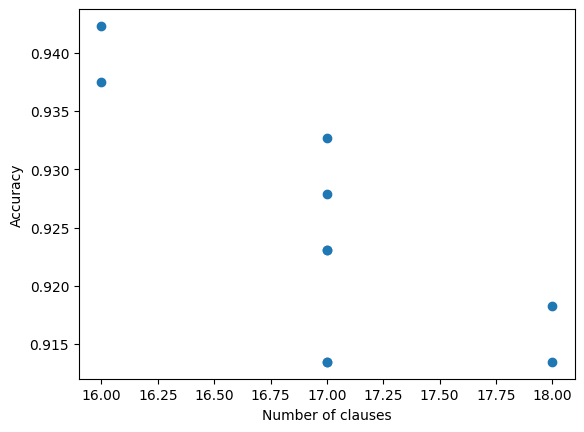

In [5]:
# Plot the acc wrt the number of clauses
# Hypptheses, the more clauses the worse the accuracy

accuracies = []
n_clauses = []
for classifier in classifiers:
    accuracies.append(classifier.model[learning_class]["score"])
    n_clauses.append(len(classifier.model[learning_class]["cnf_weights"]))


plt.plot(n_clauses, accuracies, 'o')
plt.xlabel("Number of clauses")
plt.ylabel("Accuracy")
plt.show()

In [6]:
test_size = 0.85

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=SEED)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# Training data distribution
print("Distribution of training data")
print(pd.Series(y_train).value_counts())

# Hypothesis: the most concise models classify better
# We can meassure ow concise a model is by counting the number of cliques (disjunctive clauses)

n_experiments = 40
learning_class = 1
classifiers = []
n_cycles = [2*i for i in range(1, 11)]
n_ants = [2*i for i in range(1, 11)]
for i in range(10):
    aco_config = ACOConfig(algorithm="vertex-ac", cycles=n_cycles[i], ants=n_ants[i], alpha=1, rho=0.99, tau_max=6., tau_min=0.01)
    classifier = OQATClassifier(collision_strategy="best_score", null_strategy="weighted", heuristic="aco", heuristic_config=aco_config)
    classifier.fit(X_train, y_train, column_names, column_types, n_discrete_bins=3, learn_classes=[learning_class])
    classifiers.append(classifier)
    print(f"Model {i + 1}, number of clauses: {len(classifier.model[learning_class]['cnf_weights'])}")

(259, 6)
(259,)
(1469, 6)
(1469,)
Distribution of training data
0    168
1     64
2     14
3     13
dtype: int64
Model 1, number of clauses: 13
Model 2, number of clauses: 11
Model 3, number of clauses: 10
Model 4, number of clauses: 10
Model 5, number of clauses: 11
Model 6, number of clauses: 10


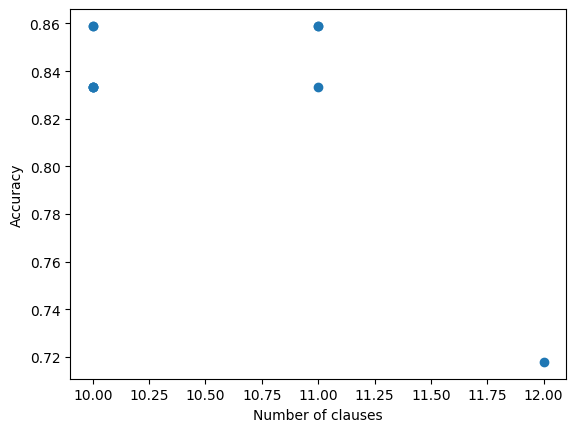

In [ ]:
accuracies = []
n_clauses = []
for classifier in classifiers:
    accuracies.append(classifier.model[learning_class]["score"])
    n_clauses.append(len(classifier.model[learning_class]["cnf_weights"]))


plt.plot(n_clauses, accuracies, 'o')
plt.xlabel("Number of clauses")
plt.ylabel("Accuracy")
plt.show()